<a href="https://colab.research.google.com/github/Gowri-Rk/Machine-Learning/blob/master/Colabs/Alternus%20Vera%20Project/ML_AlternusVera_VerifiableAuthenticity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alternus Vera - Objective, Datasets description

**Name : Shree Gowri Radhakrishna** 

**Student ID : 014554852**

**Team : DataTribe**

In today's world the fake news spreads faster than real news and its important to detect fake news in order to mitigate its negative effects. This project contains analysis and detection of fake news based on verifiable authenticity of the news statement.

DataSets used:

1. Liar Liar Dataset: Contains news statements classified as a range of values from True to PantsOnFire. 
2. Kaggle Fake News Dataset: Contains a binary classification of text and author

**Feature: Verifiable Auntenticity**
To classify a news as fake or real, one of the main steps is to find out whether the data can be verified as authentic or not. This involves:
1. Checking the **source** of the news: News obtained from social media or memes tend to be fake. However, news reported by a genuine news publication can be trusted.

**How**: Buzzfeed's dataset on website authenticity (amalgamate)

2. **Credibility**: Some people might give deliberate misinformation to mislead readers. Its important to check the credibilty of the speaker as well as the author of the post.

**How**: Check the past statements made by the speaker to see no. of his false/ true statements

3. **False representation**: These are employed to catch the attention of viewers with false information.

**How**: Cosine similarity with fake_news dataset on the text to match fake news statements



**Method:** 
Encode the "source" column of liar liar dataset to fall into categories for Fake and Real news based on the source credibility.

**Classification algorithms**: Naive Bayes, Decision Trees, SVM, Linear Regression, Logistic Regression

What worked: Data cleaning, pre-processing and LDA topic modelling, distillation, classification

What didn't work well: Data amalgamation with an other dataset that could enrich the current dataset to provide a stronger feature of authenticity. 

# Imports and data read

In [ ]:
import numpy as np
import csv
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from string import punctuation
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import re
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
import matplotlib.pyplot as plt
from scipy import sparse

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
#liar liar dataset column names

liar_col = ['id',	'label'	,'statement',	'subject',	'speaker', 	'job', 	'state',	'party',	'barely_true',	'false',	'half_true',	'mostly_true',	'pants_on_fire',	'venue']

In [ ]:
df_liar_train = pd.read_csv("/content/gdrive/My Drive/MLSpring2020/datatribe-nutritionbasediseaseprediction/AlternusVera/Datasets/liar_dataset/train.tsv", names=liar_col, sep = "\t")

In [ ]:
df_liar_test = pd.read_csv("/content/gdrive/My Drive/MLSpring2020/datatribe-nutritionbasediseaseprediction/AlternusVera/Datasets/liar_dataset/test.tsv", names=liar_col, sep = "\t")
df_liar_val = pd.read_csv("/content/gdrive/My Drive/MLSpring2020/datatribe-nutritionbasediseaseprediction/AlternusVera/Datasets/liar_dataset/valid.tsv", names=liar_col, sep = "\t")

In [ ]:
df_fake_train = pd.read_csv("/content/gdrive/My Drive/MLSpring2020/datatribe-nutritionbasediseaseprediction/AlternusVera/Datasets/fake_news/train.csv")
df_fake_test = pd.read_csv("/content/gdrive/My Drive/MLSpring2020/datatribe-nutritionbasediseaseprediction/AlternusVera/Datasets/fake_news/test.csv")
df_fake_sub = pd.read_csv("/content/gdrive/My Drive/MLSpring2020/datatribe-nutritionbasediseaseprediction/AlternusVera/Datasets/fake_news/submit.csv")

In [ ]:
df_liar_train.head(10)

,id,label,statement,subject,speaker,job,state,party,barely_true,false,half_true,mostly_true,pants_on_fire,venue
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
5,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece
6,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.
7,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa."
8,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website
9,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video


In [ ]:
unique = df_liar_train["venue"].unique()
df_unique = pd.DataFrame(unique, columns=['Unique_Venues'])

In [ ]:
df_unique

,Unique_Venues
0,a mailer
1,a floor speech.
2,Denver
3,a news release
4,an interview on CNN
...,...
4341,a talk show discussion
4342,a New York magazine article.
4343,a recorded telephone message to Cranston resid...
4344,"interview on ""The Colbert Report"""


In [ ]:
df_unique.to_csv("unique.csv", sep=',')


In [ ]:
df_fake_train.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


# Data Cleaning, Preprocessing, Visualization

In [ ]:
import re
def cleaning(raw_news):
    import nltk
    
    # 1. Remove non-letters/Special Characters and Punctuations
    news = re.sub("[^a-zA-Z]", " ", raw_news)
    
    # 2. Convert to lower case.
    news =  news.lower()
    
    # 3. Tokenize.
    news_words = nltk.word_tokenize( news)
    
    # 4. Convert the stopwords list to "set" data type.
    stops = set(nltk.corpus.stopwords.words("english"))
    
    # 5. Remove stop words. 
    words = [w for w in  news_words  if not w in stops]
    
    # 6. Lemmentize 
    wordnet_lem = [ WordNetLemmatizer().lemmatize(w) for w in words ]
    
    # 7. Stemming
    stems = [nltk.stem.SnowballStemmer('english').stem(w) for w in wordnet_lem ]
    
    # 8. Join the stemmed words back into one string separated by space, and return the result.
    return " ".join(stems)

In [ ]:
import time

# clean training and test data 
# create new column "tokenized"
t1 = time.time()

# Add the processed data to the original data. 
# Perhaps using apply function would be more elegant and concise than using for loop
df_liar_train['clean'] = df_liar_train["statement"].apply(cleaning) 

t2 = time.time()
print("\nTime to clean, tokenize and stem train data: \n", len(df_liar_train), "news:", (t2-t1)/60, "min")

t1 = time.time()
df_liar_test['clean'] = df_liar_test["statement"].apply(cleaning)

t2 = time.time()
print("\n\nTime to clean, tokenize and stem test data: \n", len(df_liar_test), "news:", (t2-t1)/60, "min")

t1 = time.time()
df_liar_val['clean'] = df_liar_val["statement"].apply(cleaning)

t2 = time.time()
print("\n\nTime to clean, tokenize and stem valid data: \n", len(df_liar_val), "news:", (t2-t1)/60, "min")


Time to clean, tokenize and stem train data: 
 10240 news: 0.10678733189900716 min


Time to clean, tokenize and stem test data: 
 1267 news: 0.010883772373199463 min


Time to clean, tokenize and stem valid data: 
 1284 news: 0.010524117946624756 min


## Spell checker

In [ ]:
model = gensim.models.KeyedVectors.load_word2vec_format('input_data/GoogleNews-vectors-negative300.bin.gz', binary=True)
words = model.index2word

w_rank = {}
for i,word in enumerate(words):
    w_rank[word] = i

WORDS = w_rank

In [ ]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return - WORDS.get(word, 0)

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [ ]:
def spell_checker(text):
    all_words = re.findall(r'\w+', text.lower()) # split sentence to words
    spell_checked_text  = []
    for i in range(len(all_words)):
        spell_checked_text.append(correction(all_words[i]))
    return ' '.join(spell_checked_text)

In [ ]:
print("Before: \n", train_news['clean'][0] )
t1 = time.time()
train_news['clean'] = train_news['clean'].apply(spell_checker)
t2 = time.time()
print("\nTime to spell check the train data: \n", len(train_news), "news:", (t2-t1)/60, "min")

print("\nAfter: \n",train_news['clean'][0] )
train_news.head(5)

In [ ]:
t1 = time.time()
test_news['clean'] = test_news['clean'].apply(spell_checker)
test_news.head(5)
t2 = time.time()
print("\nTime to spell check the test data: \n", len(test_news), "news:", (t2-t1)/60, "min")

In [ ]:
t1 = time.time()
valid_news['clean'] = valid_news['clean'].apply(spell_checker)
valid_news.head(5)
t2 = time.time()
print("\nTime to spell check the valid data: \n", len(valid_news), "news:", (t2-t1)/60, "min")

In [ ]:
train_news.to_csv("input_data/train_processed.csv", sep=',')
test_news.to_csv("input_data/test_processed.csv", sep=',')
valid_news.to_csv("input_data/valid_processed.csv", sep=',')

# LDA Modeling

In [ ]:
df_liar_train['index'] = df_liar_train.index
data = df_liar_train
train_lda = data[['clean', 'index']]
train_lda.head(4)

,clean,index
0,say anni list polit group support third trimes...,0
1,declin coal start start natur gas took start b...,1
2,hillari clinton agre john mccain vote give geo...,2
3,health care reform legisl like mandat free sex...,3


In [ ]:
df_liar_test['index'] = df_liar_test.index
data = df_liar_test
test_lda = data[['clean', 'index']]
test_lda.head(4)

,clean,index
0,build wall u mexico border take liter year,0
1,wisconsin pace doubl number layoff year,1
2,say john mccain done noth help vet,2
3,suzann bonamici support plan cut choic medicar...,3


In [ ]:
df_liar_val['index'] = df_liar_val.index
data = df_liar_val
valid_lda = data[['clean', 'index']]
valid_lda.head(4)

,clean,index
0,le american work,0
1,obama sworn offic use holi bibl instead kuran ...,1
2,say organ parad social welfar organ involv pol...,2
3,say near half oregon child poor,3


In [ ]:
processed_docs = train_lda['clean'].map(lambda doc: doc.split(" "))
processed_docs[:4]

0    [say, anni, list, polit, group, support, third...
1    [declin, coal, start, start, natur, gas, took,...
2    [hillari, clinton, agre, john, mccain, vote, g...
3    [health, care, reform, legisl, like, mandat, f...
Name: clean, dtype: object

**LDA**

In [ ]:
def get_word_tokens(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) > 3:
            result.append(token)
    return result
tokenized_docs_local = df_liar_train['clean'].map(get_word_tokens)

In [ ]:
def get_dictionary_print_words(dataframe,colname):
    dictionary_gensim = gensim.corpora.Dictionary(processed_docs)
    count = 0
    print('######## DICTIONARY Words and occurences ########')
    for k, v in dictionary_gensim.iteritems():
        print(k, v)
        count += 1
        if count > 10:
            break
    dictionary_gensim.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
    return dictionary_gensim, tokenized_docs_local

In [ ]:

def get_bow_corpus_print_sample(dataframe,colname):
    dictionary_gensim, tokenized_docs_local = get_dictionary_print_words(dataframe, colname)
    bow_corpus_local = [dictionary_gensim.doc2bow(doc) for doc in tokenized_docs_local]
    bow_doc_local_0 = bow_corpus_local[0]
    print('\n ######## BOW VECTOR FIRST ITEM ########')
    print(bow_doc_local_0)
    print('\n ######## PREVIEW BOW ########')
    for i in range(len(bow_doc_local_0)):
        print("Word {} (\"{}\") appears {} time.".format(bow_doc_local_0[i][0], 
                                               dictionary_gensim[bow_doc_local_0[i][0]], bow_doc_local_0[i][1]))
    return bow_corpus_local, dictionary_gensim

In [ ]:
def get_tfidf_corpus_print_sample(bow_corpus_local):
    from gensim import corpora, models
    tfidf = models.TfidfModel(bow_corpus_local)
    tfidf_corpus_local = tfidf[bow_corpus_local]
    print('\n ######## TFIDF VECTOR FIRST ITEM ########')
    
    from pprint import pprint
    for doc in tfidf_corpus_local:
        pprint(doc)
        break
    return tfidf_corpus_local

In [ ]:
def get_lda_model_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model

In [ ]:
def get_lda_model_topics_topwords_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2, random_state=1)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model,lda_topics_words

In [ ]:
def identify_topic_number_score_label_topwords(text,dictionary_local,lda_model_local,lda_topics_top_words_local):
    bow_vector_local = dictionary_local.doc2bow(get_word_tokens(text))
    topic_number_local, topic_score_local = sorted(
        lda_model_local[bow_vector_local], key=lambda tup: -1*tup[1])[0]
    #print (topic_number_local, topic_score_local)
    return pd.Series([topic_number_local, topic_score_local," ".join(lda_topics_top_words_local[int(topic_number_local)][1])])

In [ ]:
def update_lda_results_to_dataset(dataframe,topiccolnames,coltoapplylda,colnamedictionary,colnameldamodel, colnameldatopwords):
    dataframe[topiccolnames] = dataframe.apply(
    lambda row: identify_topic_number_score_label_topwords(
        row[coltoapplylda],colnamedictionary,colnameldamodel,
        colnameldatopwords), axis=1)
    return dataframe

Bag of Words

In [ ]:
bow_corpus_headline, dictionary_headline = get_bow_corpus_print_sample(df_liar_train,
                                                                      'clean')

######## DICTIONARY Words and occurences ########
0 abort
1 anni
2 demand
3 group
4 list
5 polit
6 say
7 support
8 third
9 trimest
10 administr

 ######## BOW VECTOR FIRST ITEM ########
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (6, 1), (7, 1)]

 ######## PREVIEW BOW ########
Word 0 ("abort") appears 1 time.
Word 1 ("demand") appears 1 time.
Word 2 ("group") appears 1 time.
Word 3 ("list") appears 1 time.
Word 4 ("polit") appears 1 time.
Word 6 ("support") appears 1 time.
Word 7 ("third") appears 1 time.


In [ ]:
lda_model_headline, lda_headline_topic_words = get_lda_model_topics_topwords_print_top_topics(
    bow_corpus_headline, 10 ,dictionary_headline)

0::['state', 'romney', 'mitt', 'support', 'dollar', 'percent', 'peopl', 'health', 'million', 'abort']
1::['state', 'presid', 'percent', 'rate', 'obama', 'citi', 'clinton', 'nation', 'counti', 'texa']
2::['state', 'year', 'time', 'everi', 'unit', 'last', 'million', 'five', 'sinc', 'three']
3::['obama', 'state', 'barack', 'would', 'presid', 'school', 'countri', 'bill', 'plan', 'nation']
4::['year', 'percent', 'american', 'creat', 'care', 'budget', 'feder', 'health', 'privat', 'averag']
5::['percent', 'vote', 'spend', 'year', 'state', 'time', 'increas', 'debt', 'billion', 'fund']
6::['obama', 'presid', 'vote', 'billion', 'barack', 'sinc', 'said', 'rais', 'last', 'even']
7::['health', 'care', 'govern', 'vote', 'million', 'peopl', 'hous', 'insur', 'senat', 'bill']
8::['peopl', 'million', 'health', 'secur', 'plan', 'would', 'social', 'want', 'trump', 'republican']
9::['percent', 'state', 'countri', 'crime', 'offic', 'world', 'popul', 'island', 'rhode', 'largest']


In [ ]:
tfidf_corpus_headline = get_tfidf_corpus_print_sample(bow_corpus_headline)


 ######## TFIDF VECTOR FIRST ITEM ########
[(0, 0.31921867550751726),
 (1, 0.47006877100752914),
 (2, 0.38412798555344074),
 (3, 0.43593190233616774),
 (4, 0.3828926309176976),
 (6, 0.2555959049909224),
 (7, 0.35722236983665817)]


In [ ]:
lda_tfidf_model_headline  = get_lda_model_print_top_topics(tfidf_corpus_headline,10,dictionary_headline)


0::['obama', 'presid', 'peopl', 'clinton', 'barack', 'economi', 'percent', 'hillari', 'parti', 'year']
1::['percent', 'year', 'million', 'state', 'everi', 'rate', 'today', 'student', 'unemploy', 'dollar']
2::['percent', 'american', 'obama', 'class', 'middl', 'state', 'work', 'rate', 'presid', 'crist']
3::['senat', 'obama', 'state', 'percent', 'energi', 'vote', 'candid', 'year', 'counti', 'rubio']
4::['reagan', 'state', 'ronald', 'percent', 'year', 'florida', 'court', 'industri', 'feder', 'wisconsin']
5::['care', 'state', 'health', 'social', 'secur', 'school', 'privat', 'rick', 'system', 'percent']
6::['state', 'medicar', 'texa', 'ryan', 'world', 'paul', 'food', 'budget', 'fire', 'year']
7::['year', 'state', 'percent', 'rais', 'governor', 'rate', 'debt', 'incom', 'countri', 'highest']
8::['immigr', 'illeg', 'year', 'want', 'dont', 'state', 'presid', 'percent', 'obama', 'vote']
9::['health', 'care', 'romney', 'mitt', 'plan', 'obama', 'said', 'bill', 'first', 'presid']


In [ ]:
semisupervised_topic_labels = ['topic0','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9']

In [ ]:
headlinetopiccolnames = ['topic_number','lda_score','topic_top_words']
df_liar_train = update_lda_results_to_dataset(
    df_liar_train, headlinetopiccolnames,'clean', dictionary_headline, lda_model_headline, lda_headline_topic_words)
df_liar_train.head()

,id,label,statement,subject,speaker,job,state,party,barely_true,false,half_true,mostly_true,pants_on_fire,venue,clean,index,topic_number,lda_score,topic_top_words
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimes...,0,0,0.556989,state romney mitt support dollar percent peopl...
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,declin coal start start natur gas took start b...,1,1,0.352214,state presid percent rate obama citi clinton n...
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillari clinton agre john mccain vote give geo...,2,8,0.924986,peopl million health secur plan would social w...
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legisl like mandat free sex...,3,8,0.483978,peopl million health secur plan would social w...
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term,4,3,0.774959,obama state barack would presid school countri...


In [ ]:
headlinetopiccolnames = ['topic_number','lda_score','topic_top_words']
df_liar_train = update_lda_results_to_dataset(
    df_liar_train, headlinetopiccolnames,'clean', dictionary_headline, lda_model_headline, lda_headline_topic_words)
df_liar_train.head()

,id,label,statement,subject,speaker,job,state,party,barely_true,false,half_true,mostly_true,pants_on_fire,venue,clean,index,topic_number,lda_score,topic_top_words
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimes...,0,0,0.557005,state romney mitt support dollar percent peopl...
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,declin coal start start natur gas took start b...,1,1,0.368751,state presid percent rate obama citi clinton n...
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillari clinton agre john mccain vote give geo...,2,8,0.924987,peopl million health secur plan would social w...
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legisl like mandat free sex...,3,8,0.487009,peopl million health secur plan would social w...
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term,4,3,0.774959,obama state barack would presid school countri...


In [ ]:
df_liar_test = update_lda_results_to_dataset(
    df_liar_test,headlinetopiccolnames,'clean',
  dictionary_headline,lda_model_headline,lda_headline_topic_words)
df_liar_test.head()

,id,label,statement,subject,speaker,job,state,party,barely_true,false,half_true,mostly_true,pants_on_fire,venue,clean,index,topic_number,lda_score,topic_top_words
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,build wall u mexico border take liter year,0,0,0.871384,state romney mitt support dollar percent peopl...
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,wisconsin pace doubl number layoff year,1,5,0.819965,percent vote spend year state time increas deb...
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,say john mccain done noth help vet,2,8,0.849976,peopl million health secur plan would social w...
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,suzann bonamici support plan cut choic medicar...,3,3,0.576703,obama state barack would presid school countri...
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,ask report whether he center crimin scheme vio...,4,6,0.675414,obama presid vote billion barack sinc said rai...


In [ ]:
df_liar_val = update_lda_results_to_dataset(
    df_liar_val,headlinetopiccolnames,'clean',
  dictionary_headline,lda_model_headline,lda_headline_topic_words)
df_liar_val.head()

,id,label,statement,subject,speaker,job,state,party,barely_true,false,half_true,mostly_true,pants_on_fire,venue,clean,index,topic_number,lda_score,topic_top_words
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,le american work,0,4,0.699938,year percent american creat care budget feder ...
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,obama sworn offic use holi bibl instead kuran ...,1,3,0.458477,obama state barack would presid school countri...
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,say organ parad social welfar organ involv pol...,2,0,0.782153,state romney mitt support dollar percent peopl...
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,say near half oregon child poor,3,7,0.503553,health care govern vote million peopl hous ins...
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,attack republican various program econom stimu...,4,3,0.501688,obama state barack would presid school countri...


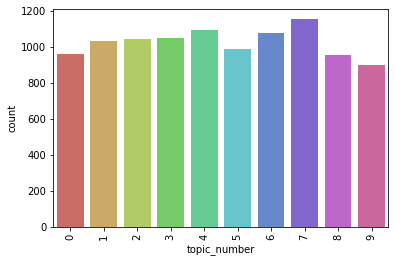

In [ ]:
import seaborn as sb
def create_distribution(dataFile):
    g = sb.countplot(x='topic_number', data=dataFile, palette='hls')
    g.set_xticklabels(g.get_xticklabels(),rotation=90)

    return g

create_distribution(df_liar_train) # TRAIN Document Vector

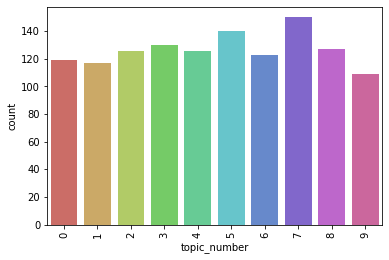

In [ ]:
create_distribution(df_liar_test)# TEST Document Vector

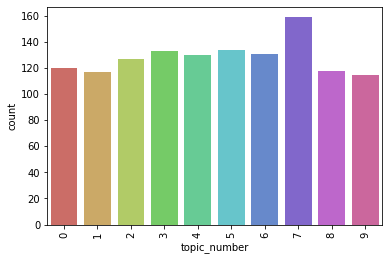

In [ ]:
create_distribution(df_liar_val)# VALID Document Vector

# Distillation

Distillation involves creating a new feature of authenticity based on the 


source of the statement.

In [ ]:
true_labels = ['original','true','mostly-true','half-true']
false_labels = ['barely-true','false','pants-fire']
def simplify_label(input_label):
    if input_label in true_labels:
        return 1
    else:
        return 0

In [ ]:
labelcolname = 'encoded_label'

df_liar_train[labelcolname] = df_liar_train.apply(lambda row: simplify_label(row['label']), axis=1)
df_liar_test[labelcolname] = df_liar_test.apply(lambda row: simplify_label(row['label']), axis=1)
df_liar_val[labelcolname] = df_liar_val.apply(lambda row: simplify_label(row['label']), axis=1)

In [ ]:
df_fake_train['encoded_label'] = df_fake_train[['label']]
df_fake_sub['encoded_label'] = df_fake_sub[['label']]

In [ ]:
true_labels = ['news','interview','television','show', 'speech', 'reporters', 'debate', 'newsletter', 'press', 'CNN', 'ABC', 'CBS', 'video', 'conference', 'official', 'book']
false_labels = ['website', 'tweet', 'mail', 'e-mail', 'mailer', 'web', 'site', 'meme', 'comic', 'advertisement', 'ad', 'blog', 'flier', 
                'letter', 'social', 'tweets', 'internet', 'message', 'campaign', 'post', 'facebook', 'handout', 'leaflet', 'letter' ]
def simplify_venue_label(input_label):
    words = input_label.split(" ")
    for s in words:
      if s in true_labels:
        return 1
      elif s in false_labels:
        return 0
    else:
        return 1

In [ ]:
labelcolname = 'authenticity'

df_liar_train[labelcolname] = df_liar_train.apply(lambda row: simplify_venue_label(str(row['venue'])), axis=1)
df_liar_test[labelcolname] = df_liar_test.apply(lambda row: simplify_venue_label(str(row['venue'])), axis=1)
df_liar_val[labelcolname] = df_liar_val.apply(lambda row: simplify_venue_label(str(row['venue'])), axis=1)


In [ ]:
obj = [df_liar_train, df_liar_val]
df_train = pd.concat(obj)

In [ ]:
X_train = df_train['authenticity'].values.reshape(-1, 1)
Y_train = df_train['encoded_label'].values
X_test = df_liar_test['authenticity'].values.reshape(-1, 1)
Y_test = df_liar_test['encoded_label'].values.reshape(-1, 1)

# Classification

Naive Bayes Classifier

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()
gnb.fit(X_train,Y_train)
predicted = gnb.predict(X_test)
print(classification_report(Y_test, predicted))
cnfmtx=confusion_matrix(Y_test, predicted)
print("Confusion matrix:\n",cnfmtx)

print("Mean squared error: %.2f" %mean_squared_error(Y_test, predicted))
print("Mean absolute error: %.2f" %mean_absolute_error(Y_test, predicted))
print('Root Mean Squared Error: %.2f ' %np.sqrt(mean_squared_error(Y_test, predicted)))
print('Accuracy :', accuracy_score(Y_test, predicted))

              precision    recall  f1-score   support

           0       0.49      0.24      0.32       553
           1       0.58      0.81      0.67       714

    accuracy                           0.56      1267
   macro avg       0.53      0.52      0.50      1267
weighted avg       0.54      0.56      0.52      1267

Confusion matrix:
 [[133 420]
 [139 575]]
Mean squared error: 0.44
Mean absolute error: 0.44
Root Mean Squared Error: 0.66 
Accuracy : 0.5588003157063931


**Decision Tree Classifier**

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)

predicted=clf.predict(X_test)


cnfmtx=confusion_matrix(Y_test, predicted)
print("Confusion matrix:\n",cnfmtx)


print("Mean squared error: %.2f" %mean_squared_error(Y_test, predicted))
print("Mean absolute error: %.2f" %mean_absolute_error(Y_test, predicted))
print('Root Mean Squared Error: %.2f ' %np.sqrt(mean_squared_error(Y_test, predicted)))
print('Accuracy :', accuracy_score(Y_test, predicted))

Confusion matrix:
 [[  0 553]
 [  0 714]]
Mean squared error: 0.44
Mean absolute error: 0.44
Root Mean Squared Error: 0.66 
Accuracy : 0.56353591160221


**Support Vector Machines**




In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
model = SVC()
model.fit(X_train,Y_train)
predicted = model.predict(X_test)
print(classification_report(Y_test, predicted))
cnfmtx=confusion_matrix(Y_test, predicted)
print("Confusion matrix:\n",cnfmtx)

print("Mean squared error: %.2f" %mean_squared_error(Y_test, predicted))
print("Mean absolute error: %.2f" %mean_absolute_error(Y_test, predicted))
print('Root Mean Squared Error: %.2f ' %np.sqrt(mean_squared_error(Y_test, predicted)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       553
           1       0.56      1.00      0.72       714

    accuracy                           0.56      1267
   macro avg       0.28      0.50      0.36      1267
weighted avg       0.32      0.56      0.41      1267

Confusion matrix:
 [[  0 553]
 [  0 714]]
Mean squared error: 0.44
Mean absolute error: 0.44
Root Mean Squared Error: 0.66 


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,Y_train)


print("Mean squared error: %.2f" %mean_squared_error(Y_test, predicted))
print("Mean absolute error: %.2f" %mean_absolute_error(Y_test, predicted))
print('Root Mean Squared Error: %.2f ' %np.sqrt(mean_squared_error(Y_test, predicted)))

Mean squared error: 0.44
Mean absolute error: 0.44
Root Mean Squared Error: 0.66 


# Regression

Statement: What is the probablility of the news being fake or real based on the credibility of the source


In [ ]:
from sklearn import linear_model
logClassifier = linear_model.LogisticRegression(solver='liblinear', C=1, random_state=111)
logClassifier.fit(X_train, Y_train)
predicted = logClassifier.predict(X_test)

from sklearn import metrics
print("accuracy=", metrics.accuracy_score(Y_test, predicted))

accuracy= 0.56353591160221


# Results and analysis

The process of distillation yielded a new feature of authenticity, which gave a prediction accuracy of 56%. We could predict the fake news based on authenticity with a not so good accuracy. This has to be improved.

In [ ]:
def getAuthenticityScoreBySource(src):
  x = simplify_venue_label(src)
  xTrain = np.array(x).reshape(-1, 1)
  xPpredicted = logClassifier.predict(xTrain)
  xPredicedProb = logClassifier.predict_proba(xTrain)[:,1]
  return 1 - float(xPredicedProb)

print(getAuthenticityScoreBySource('news'))

0.42867986485281695


# References

1. https://github.com/aarsanjani/AlternusVera